In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

import plotly.express as px

In [2]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [3]:
customer = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-ivleva/проект/olist_customers_dataset.csv')
order = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-ivleva/проект/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
product = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-ivleva/проект/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

объединение таблиц customer и order

In [4]:
customer_order = pd.merge(customer, order, on="customer_id")

In [5]:
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


Вопрос 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

За покупку принимаем заказ в статусе "delivered", т.е. только те, которые были переданы покупателю.

In [10]:
delivered_order = customer_order.query("order_status == 'delivered'")\
    .groupby(['customer_unique_id'], as_index=False)\
    .agg({'order_id': 'count'})\
    .sort_values('order_id')

Доставленные заказы

In [11]:
delivered_order

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
61790,a942d415001f36acf150dca4a627f6aa,1
61789,a942ba2a7bed631c5d4ec4d756b9df90,1
61788,a942204dbe5292ccb73d3171b6d03d54,1
61787,a941c257a51188577ec66ddbeee21403,1
...,...,...
73921,ca77025e7201e3b30c44b472ff346268,7
36706,6469f99c1f9dfae7733b25662e7f1782,7
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7
22779,3e43e6105506432c953e165fb2acf44c,9


Пользователи, которые сделали только 1 заказ

In [12]:
delivered_order.query("order_id == 1") 

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
61790,a942d415001f36acf150dca4a627f6aa,1
61789,a942ba2a7bed631c5d4ec4d756b9df90,1
61788,a942204dbe5292ccb73d3171b6d03d54,1
61787,a941c257a51188577ec66ddbeee21403,1
...,...,...
24307,428f23ed853b49c314e54eedc7c0d251,1
31087,5513ea33a42a77b2dcbc2691ad56557a,1
31334,55bccecaaf1999c1d049ad6f48190bc6,1
31092,5517917434ed6488c5aa1f2aec53de18,1


Ответ: Пользователей с 1 покупкой -  90557.

Вопрос 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [13]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Отбираем нужные колонки 

In [19]:
order2 = order[['order_id', 'order_status', 'order_purchase_timestamp']]
order2.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


добавление столбца "month"

In [21]:
order2['month'] = order2.order_purchase_timestamp.dt.month_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Заказы, которые не будут доставлены покупателям отбираем по статусам unavailable и canceled.
Заказы в остальных статусах еще могут быть доставлены, их в расчет не берем

Отбираем статусы unavailable (недоступен)

In [23]:
order_unavailable = order2.query("order_status == 'unavailable'")

In [24]:
order_unavailable 

,order_id,order_status,order_purchase_timestamp,month
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,November
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,January
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,August
737,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,January
1160,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,September
...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,unavailable,2017-10-17 10:53:48,October
99233,1c7c8ab324927f5b6e52338bd110bef4,unavailable,2017-12-23 18:48:09,December
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59,January
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,August


Отмены по причине недоступности товара по месяцам

In [26]:
order_unavailable_month = order_unavailable.groupby(['month'], as_index=False)\
    .agg({'order_id': 'count'})
order_unavailable_month

,month,order_id
0,April,14
1,August,39
2,December,42
3,February,75
4,January,58
5,July,70
6,June,28
7,March,49
8,May,47
9,November,84


Среднее количество отмен в месяц по причине недоступности товара

In [28]:
order_unavailable_month.order_id.mean().round()

51.0

Отмены по причине отказа покупателя (canceled)

In [30]:
order_canceled = order2.query("order_status == 'canceled'")
order_canceled

,order_id,order_status,order_purchase_timestamp,month
397,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,August
613,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,January
1058,3a129877493c8189c59c60eb71d97c29,canceled,2018-01-25 13:34:24,January
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,August
1801,ed3efbd3a87bea76c2812c66a0b32219,canceled,2018-09-20 13:54:16,September
...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,canceled,2017-03-11 19:51:36,March
98909,e49e7ce1471b4693482d40c2bd3ad196,canceled,2018-08-07 11:16:28,August
99143,6560fb10610771449cb0463c5ba12199,canceled,2017-10-01 22:26:25,October
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,August


Отмены по причине отказа покупателя  по месяцам

In [32]:
order_canceled_month = order_canceled.groupby(['month'], as_index=False)\
    .agg({'order_id': 'count'})
order_canceled_month

,month,order_id
0,April,33
1,August,111
2,December,11
3,February,90
4,January,37
5,July,69
6,June,34
7,March,59
8,May,53
9,November,37


Среднее количество отмен в месяц по причине отказа покупателя

In [34]:
order_canceled_month.order_id.mean().round()

52.0

Ответ: отказы по причине недоступности товаров в среднем за месяц 51, по причине отмены покупателем - 52

Вопрос 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [37]:
product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Создание столбца с днем недели

In [39]:
product['day_name'] = product.shipping_limit_date.dt.day_name()

Группировка товаров по дню недели и количеству заказов

In [41]:
product_order_sum = product.groupby(['product_id', 'day_name'], as_index=False)\
    .agg({'order_id':'count'}).sort_values('order_id', ascending=False)\
    .rename(columns={'order_id':'order_sum'})
product_order_sum

,product_id,day_name,order_sum
14850,422879e10f46682990de24d770e7f83d,Thursday,159
38319,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,149
12680,389d119b48cf3043d311335e499d9c6b,Thursday,145
34119,99a4788cb24856965c36a24e339b6058,Thursday,141
12177,368c6c730842d78016ad823897a372db,Thursday,131
...,...,...,...
22685,655427924aa82cda2749c647becca121,Tuesday,1
22686,6557070af155fe4cc5820b0e123ecdf8,Tuesday,1
22687,65586e7ecd256d15d4360a6854d15b14,Thursday,1
22688,65607db9823444a6ba5b7a82431e4502,Wednesday,1


Группировка товаров по максимальному количеству заказов 

In [43]:
product_order_max = product_order_sum.groupby ('product_id', as_index=False)\
    .agg({'order_sum': 'max'})\
    .sort_values ('order_sum', ascending=False)\
    .rename(columns={'order_sum':'max_order_sum'})
product_order_max

,product_id,max_order_sum
8613,422879e10f46682990de24d770e7f83d,159
22112,aca2eb7d00ea1a7b8ebd4e68314663af,149
7364,389d119b48cf3043d311335e499d9c6b,145
19742,99a4788cb24856965c36a24e339b6058,141
7079,368c6c730842d78016ad823897a372db,131
...,...,...
12928,64123627d4116a2bc8284f1bc0a257f3,1
12927,64118e924b5de8663f5cb1caad0abff8,1
12926,6410668313e664e438837bf86363fcb9,1
12925,640fcadaeb5f06f26d6b07d366cebd34,1


Объединение таблиц product_order_sum и product_order_max

In [45]:
result_product = product_order_sum.merge(product_order_max, on='product_id')
result_product

,product_id,day_name,order_sum,max_order_sum
0,422879e10f46682990de24d770e7f83d,Thursday,159,159
1,422879e10f46682990de24d770e7f83d,Wednesday,108,159
2,422879e10f46682990de24d770e7f83d,Monday,77,159
3,422879e10f46682990de24d770e7f83d,Tuesday,73,159
4,422879e10f46682990de24d770e7f83d,Friday,60,159
...,...,...,...,...
57075,655427924aa82cda2749c647becca121,Tuesday,1,1
57076,6557070af155fe4cc5820b0e123ecdf8,Tuesday,1,1
57077,65586e7ecd256d15d4360a6854d15b14,Thursday,1,1
57078,65607db9823444a6ba5b7a82431e4502,Wednesday,1,1


In [46]:
result_product.query('order_sum == max_order_sum')

,product_id,day_name,order_sum,max_order_sum
0,422879e10f46682990de24d770e7f83d,Thursday,159,159
6,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,149,149
12,389d119b48cf3043d311335e499d9c6b,Thursday,145,145
18,99a4788cb24856965c36a24e339b6058,Thursday,141,141
24,368c6c730842d78016ad823897a372db,Thursday,131,131
...,...,...,...,...
57075,655427924aa82cda2749c647becca121,Tuesday,1,1
57076,6557070af155fe4cc5820b0e123ecdf8,Tuesday,1,1
57077,65586e7ecd256d15d4360a6854d15b14,Thursday,1,1
57078,65607db9823444a6ba5b7a82431e4502,Wednesday,1,1


Итоговая таблица с указанием дней наибольшей частоты покупок

In [48]:
result_product.groupby('product_id', as_index=False).agg({'day_name': pd.Series.mode})

,product_id,day_name
0,00066f42aeeb9f3007548bb9d3f33c38,Thursday
1,00088930e925c41fd95ebfe695fd2655,Monday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Thursday, Tuesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Monday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[Monday, Thursday]"
32947,fff81cc3158d2725c0655ab9ba0f712c,Friday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,"[Monday, Thursday, Tuesday, Wednesday]"


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [18]:
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


Создаем новые столбцы

In [20]:
customer_order['daysinmonth'] = customer_order.order_delivered_customer_date.dt.daysinmonth

In [21]:
customer_order['number_of_weeks'] =(customer_order.daysinmonth / 7).round(2)

Отбираем нужные колонки

In [23]:
customer_order_selection = customer_order[['customer_unique_id', 'order_id', 'order_delivered_customer_date', 'number_of_weeks']]

Добавляем колонку "month"

In [25]:
customer_order_selection['month'] = customer_order_selection.order_delivered_customer_date.dt.month_name()
customer_order_selection

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_unique_id,order_id,order_delivered_customer_date,number_of_weeks,month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,4.43,May
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,4.43,January
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,4.29,June
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,4.43,March
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,4.43,August
...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,4.29,April
99437,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,4.29,April
99438,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-05-09 19:03:15,4.43,May
99439,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,4.29,November


Группируем по уникальным пользователям и месяцу.
Дополнительно делаем сортировку, чтобы убедиться, что есть покупатели с заказами более 1

In [27]:
customer_order_selection2 = customer_order_selection.groupby(['customer_unique_id', 'month'], as_index=False)\
    .agg({'order_id': 'count'})\
    .sort_values ('order_id', ascending=False)
customer_order_selection2
    

,customer_unique_id,month,order_id
7100,12f5d6e1cbf93dafd9dcc19095df0b3d,January,6
14060,25a560b9a6006157838aab1bdbd68624,April,4
74621,c8460e4251689ba205045f3ea17884a1,August,4
66622,b2bd387fdc3cf05931f0f897d607dc88,March,4
49141,83e7958a94bd7f74a9414d8782f87628,January,4
...,...,...,...
31922,55ada0c8e02119e570b002a700dac03f,July,1
31921,55ad76dbbe5e81366ed0313659bc2f44,November,1
31920,55acabc08dae3702cb38a0670ae32193,April,1
31919,55ac0a37e452fb828823ab5f1d974c10,June,1


Объединяем таблицы 

In [34]:
customer_order_fin = customer_order_selection.merge(customer_order_selection2, how='inner', on="customer_unique_id")
customer_order_fin = customer_order_fin.drop(columns='month_x')
customer_order_fin

,customer_unique_id,order_id_x,order_delivered_customer_date,number_of_weeks,month_y,order_id_y
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,4.43,May,1
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,4.43,January,1
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,4.29,June,1
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,4.43,March,1
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,4.43,August,1
...,...,...,...,...,...,...
101152,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,4.29,April,1
101153,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,4.29,April,1
101154,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-05-09 19:03:15,4.43,May,1
101155,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,4.29,November,1


Добавляем колонку для расчета количества покупок в неделю

In [35]:
customer_order_fin['order'] = customer_order_fin.order_id_y / customer_order_fin.number_of_weeks
customer_order_fin

,customer_unique_id,order_id_x,order_delivered_customer_date,number_of_weeks,month_y,order_id_y,order
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,4.43,May,1,0.225734
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,4.43,January,1,0.225734
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,4.29,June,1,0.233100
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,4.43,March,1,0.225734
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,4.43,August,1,0.225734
...,...,...,...,...,...,...,...
101152,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,4.29,April,1,0.233100
101153,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,4.29,April,1,0.233100
101154,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-05-09 19:03:15,4.43,May,1,0.225734
101155,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,4.29,November,1,0.233100


Итоговая таблица. Рассчитываем среднее количество покупок в неделю по месяцу 

In [65]:
customer_order_fin.groupby(['customer_unique_id', 'month_x'], as_index=False)\
    .agg({'order':'mean'})

,customer_unique_id,month_x,order
0,0000366f3b9a7992bf8c76cfdf3221e2,May,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,0.225734
2,0000f46a3911fa3c0805444483337064,April,0.233100
3,0000f6ccb0745a6a4b88665a16c9f078,November,0.233100
4,0004aac84e0df4da2b147fca70cf8255,November,0.233100
...,...,...,...
95273,fffcf5a5ff07b0908bd4e2dbc735a684,July,0.225734
95274,fffea47cd6d3cc0a88bd621562a9d061,January,0.225734
95275,ffff371b4d645b6ecea244b27531430a,February,0.250000
95276,ffff5962728ec6157033ef9805bacc48,May,0.225734


5. Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Определяем дату первой покупки

In [54]:
orders_1 = customer_order.groupby('customer_unique_id', as_index=False) \
                                .agg({'order_delivered_customer_date': 'min'}) \
                                .rename(columns={'order_delivered_customer_date':'1_orders'})
orders_1

,customer_unique_id,1_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-16 20:48:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-10 18:02:42
2,0000f46a3911fa3c0805444483337064,2017-04-05 14:38:47
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11-01 21:23:05
4,0004aac84e0df4da2b147fca70cf8255,2017-11-27 23:08:56
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-07-06 09:22:00
96092,fffea47cd6d3cc0a88bd621562a9d061,2018-01-09 22:28:20
96093,ffff371b4d645b6ecea244b27531430a,2017-02-22 12:45:04
96094,ffff5962728ec6157033ef9805bacc48,2018-05-14 11:54:26


Объединяем таблицы

In [56]:
customer_order_1 = customer_order.merge(orders_1, how='inner', on='customer_unique_id')
customer_order_1 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,daysinmonth,number_of_weeks,1_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,31.0,4.43,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,31.0,4.43,2018-01-29 12:41:19
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,30.0,4.29,2018-06-14 17:58:51
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,31.0,4.43,2018-03-28 16:04:25
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,31.0,4.43,2018-08-09 20:55:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,30.0,4.29,2018-04-13 20:06:37
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,30.0,4.29,2018-04-11 18:54:45
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,31.0,4.43,2018-05-09 19:03:15
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,30.0,4.29,2017-11-16 19:58:39


Отбираем нужные колонки

In [58]:
customer_order_1 = customer_order_1[['customer_unique_id', 'order_delivered_customer_date', '1_orders']]
customer_order_1

,customer_unique_id,order_delivered_customer_date,1_orders
0,861eff4711a542e4b93843c6dd7febb0,2017-05-25 10:35:35,2017-05-25 10:35:35
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-29 12:41:19,2018-01-29 12:41:19
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06-14 17:58:51,2018-06-14 17:58:51
3,259dac757896d24d7702b9acbbff3f3c,2018-03-28 16:04:25,2018-03-28 16:04:25
4,345ecd01c38d18a9036ed96c73b8d066,2018-08-09 20:55:48,2018-08-09 20:55:48
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-13 20:06:37,2018-04-13 20:06:37
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-11 18:54:45,2018-04-11 18:54:45
99438,e9f50caf99f032f0bf3c55141f019d99,2018-05-09 19:03:15,2018-05-09 19:03:15
99439,73c2643a0a458b49f58cea58833b192e,2017-11-16 19:58:39,2017-11-16 19:58:39


Создаем новые колонки

In [60]:
customer_order_1['cohort_month'] = customer_order_1['1_orders'].dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
customer_order_1['activity_month'] = customer_order_1['order_delivered_customer_date'].dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
customer_order_1

,customer_unique_id,order_delivered_customer_date,1_orders,cohort_month,activity_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-25 10:35:35,2017-05-25 10:35:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-29 12:41:19,2018-01-29 12:41:19,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06-14 17:58:51,2018-06-14 17:58:51,2018-06,2018-06
3,259dac757896d24d7702b9acbbff3f3c,2018-03-28 16:04:25,2018-03-28 16:04:25,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-08-09 20:55:48,2018-08-09 20:55:48,2018-08,2018-08
...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-13 20:06:37,2018-04-13 20:06:37,2018-04,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-11 18:54:45,2018-04-11 18:54:45,2018-04,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-05-09 19:03:15,2018-05-09 19:03:15,2018-05,2018-05
99439,73c2643a0a458b49f58cea58833b192e,2017-11-16 19:58:39,2017-11-16 19:58:39,2017-11,2017-11


Отбираем нужные для анализа колонки

In [64]:
customer_order_fin = customer_order_1[['customer_unique_id', 'activity_month', 'cohort_month']]
customer_order_fin 

,customer_unique_id,activity_month,cohort_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-08,2018-08
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-05,2018-05
99439,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11


Отфильтруем для анализа 2017 год, т.к. только в нем есть данные за все месяцы

In [66]:
customer_order_fin = customer_order_fin.query("'2017-01' <= cohort_month <= '2017-12'")
customer_order_fin

,customer_unique_id,activity_month,cohort_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
5,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09
6,4c93744516667ad3b8f1fb645a3116a4,2017-10,2017-09
8,57b2a98a409812fe9618067b6b8ebe4f,2017-11,2017-11
12,2a7745e1ed516b289ed9b29c7d0539a5,2017-12,2017-12
...,...,...,...
99429,82d46759af0369aad49084bacf85a6c3,2017-12,2017-12
99430,277490f0d435b602fe4475d4b89e9181,2017-06,2017-06
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-04,2017-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11


Создаем таблицу с когортами и количеством пользователей

In [68]:
cohorts = customer_order_fin.groupby(['cohort_month', 'activity_month']).agg({'customer_unique_id': 'nunique'})
cohorts.rename(columns={'customer_unique_id': 'total_users'}, inplace=True)
cohorts

total_users
cohort_month activity_month             
2017-01      2017-01                 263
             2017-02                   3
             2017-03                   1
             2017-05                   1
             2017-06                   1
...                                  ...
2017-12      2018-04                  14
             2018-05                   9
             2018-06                  12
             2018-07                  10
             2018-08                  10

[166 rows x 1 columns]

Создаем таблицу с размерами когорт

In [70]:
cohort_sizes = cohorts.groupby(level='cohort_month').agg({'total_users': 'first'})
cohort_sizes.rename(columns={'total_users': 'cohort_size'}, inplace=True)
cohort_sizes

,cohort_size
cohort_month,
2017-01,263
2017-02,1325
2017-03,2344
2017-04,1804
2017-05,3673
2017-06,3124
2017-07,3355
2017-08,4166
2017-09,3832


Объединяем таблицы и расчитываем retention

In [72]:
cohorts = cohorts.merge(cohort_sizes, how='inner', on='cohort_month',).reset_index()
cohorts['retention'] = cohorts['total_users'] / cohorts['cohort_size']

In [73]:
cohorts

,cohort_month,total_users,cohort_size,retention
0,2017-01,263,263,1.000000
1,2017-01,3,263,0.011407
2,2017-01,1,263,0.003802
3,2017-01,1,263,0.003802
4,2017-01,1,263,0.003802
...,...,...,...,...
161,2017-12,14,6968,0.002009
162,2017-12,9,6968,0.001292
163,2017-12,12,6968,0.001722
164,2017-12,10,6968,0.001435


Группируем по месяцу и находим средний retention внутри месяца

In [78]:
cohorts2 = cohorts.groupby('cohort_month', as_index=False).agg({'retention': 'mean'})
cohorts2

,cohort_month,retention
0,2017-01,0.082188
1,2017-02,0.057568
2,2017-03,0.057712
3,2017-04,0.064752
4,2017-05,0.065155
5,2017-06,0.069590
6,2017-07,0.074367
7,2017-08,0.079656
8,2017-09,0.086574
9,2017-10,0.093537


Ответ: 2017-12

In [79]:
cohorts2.retention.max()

0.11310435004464857

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.
Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, 
frequency и monetary для интерпретации этих кластеров. 
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, 
frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [81]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [82]:
product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Объединение таблиц

In [84]:
order_price = order.merge(product, how='inner', on='order_id')
order_price

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


Отбираем нужные колонки

In [86]:
order_selection = order_price[['customer_id', 'order_id', 'order_delivered_customer_date', 'price']]
order_selection

,customer_id,order_id,order_delivered_customer_date,price
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,118.70
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,159.90
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,19.90
...,...,...,...,...
112645,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-28 17:37:56,174.90
112646,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-09-21 11:24:17,205.99
112647,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,179.99
112648,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,179.99


Каковы временные рамки данных?

In [88]:
print('Orders from {} to {}'.format(order_selection['order_delivered_customer_date'].min(),
                                    order_selection['order_delivered_customer_date'].max()))

Orders from 2016-10-11 13:46:32 to 2018-10-17 13:22:46


In [89]:
order_selection.groupby(['order_id', 'order_delivered_customer_date', 'customer_id']).agg({'price': lambda x: x.sum()}).reset_index()
order_selection.head()

,customer_id,order_id,order_delivered_customer_date,price
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,118.70
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,159.90
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,19.90


In [90]:
NOW = order_selection['order_delivered_customer_date'].max() + timedelta(days=1)
NOW

Timestamp('2018-10-18 13:22:46')

In [91]:
period = 365

Рассчет новизны, частоты и денежной стоимости каждого клиента

In [93]:
order_selection['DaysSinceOrder'] = order_selection['order_delivered_customer_date'].apply(lambda x: (NOW - x).days)
order_selection

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,order_id,order_delivered_customer_date,price,DaysSinceOrder
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,29.99,372.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,118.70,71.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,159.90,61.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,45.00,320.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,19.90,243.0
...,...,...,...,...,...
112645,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-28 17:37:56,174.90,231.0
112646,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-09-21 11:24:17,205.99,392.0
112647,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,179.99,265.0
112648,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,179.99,265.0


In [94]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  
    'order_delivered_customer_date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), 
}
rfm = order_selection.groupby('customer_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_delivered_customer_date': 'Frequency'}, inplace=True)
rfm.head(5)

,customer_id,Recency,Frequency
0,00012a2ce6f8dcda20d059ce98491703,323.0,1
1,000161a058600d5901f007fab4c27140,449.0,0
2,0001fd6190edaaf884bcaf3d49edf079,591.0,0
3,0002414f95344307404f0ace7a26f1d5,399.0,0
4,000379cdec625522490c315e70c7a9fb,187.0,1


In [95]:
rfm['Monetary'] = rfm['customer_id'].apply(lambda x: order_selection[(order_selection['customer_id'] == x) & \
                                                           (order_selection['order_delivered_customer_date'] >= NOW - timedelta(days=period))]\
                                                           ['price'].sum())
rfm.head(5)

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,323.0,1,89.8
1,000161a058600d5901f007fab4c27140,449.0,0,0.0
2,0001fd6190edaaf884bcaf3d49edf079,591.0,0,0.0
3,0002414f95344307404f0ace7a26f1d5,399.0,0,0.0
4,000379cdec625522490c315e70c7a9fb,187.0,1,93.0


In [96]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 131.0, 0.4: 211.0, 0.6: 302.0, 0.8: 422.0},
 'Frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 0.0, 0.4: 29.99, 0.6: 72.9, 0.8: 139.9}}

In [108]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [109]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [110]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,323.0,1,89.8,2,2,4,224,hibernating
1,000161a058600d5901f007fab4c27140,449.0,0,0.0,1,1,1,111,hibernating
2,0001fd6190edaaf884bcaf3d49edf079,591.0,0,0.0,1,1,1,111,hibernating
3,0002414f95344307404f0ace7a26f1d5,399.0,0,0.0,2,1,1,211,hibernating
4,000379cdec625522490c315e70c7a9fb,187.0,1,93.0,4,2,4,424,potential loyalists


In [111]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,323.0,1,89.8,2,2,4,224,hibernating
1,000161a058600d5901f007fab4c27140,449.0,0,0.0,1,1,1,111,hibernating
2,0001fd6190edaaf884bcaf3d49edf079,591.0,0,0.0,1,1,1,111,hibernating
3,0002414f95344307404f0ace7a26f1d5,399.0,0,0.0,2,1,1,211,hibernating
4,000379cdec625522490c315e70c7a9fb,187.0,1,93.0,4,2,4,424,potential loyalists


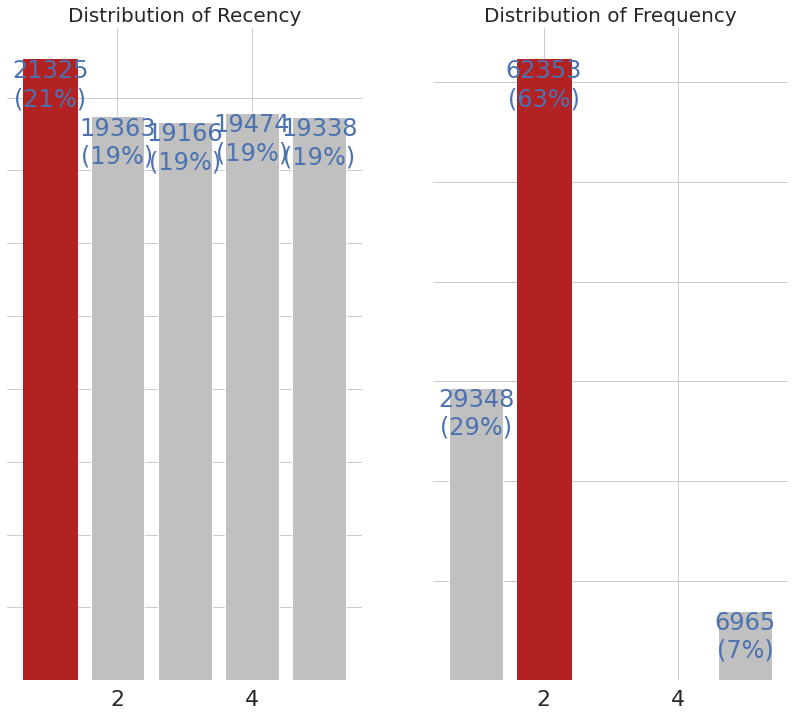

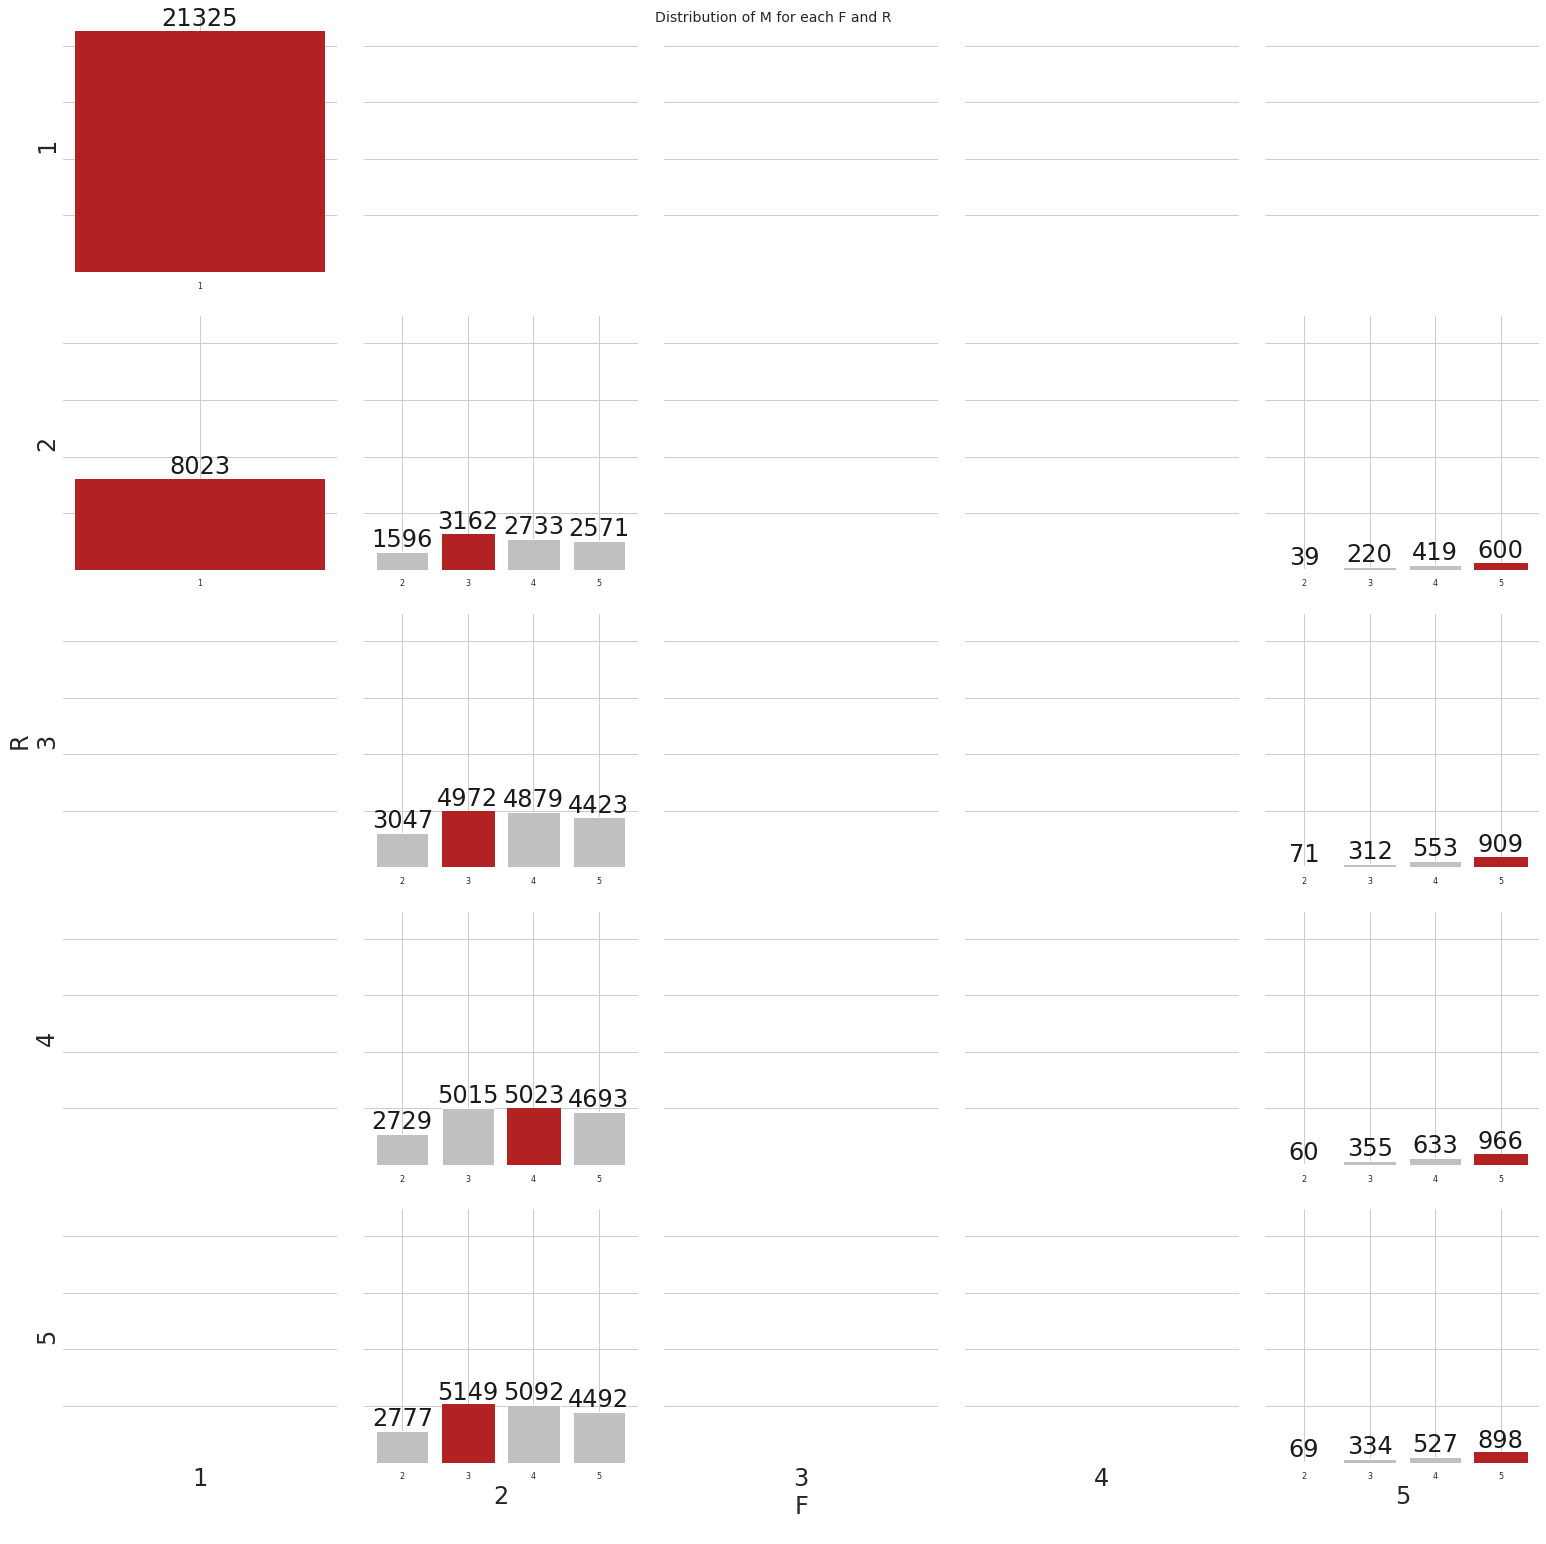

In [130]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=20)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='b')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(22, 22))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Расчет количества клиентов в каждом сегменте 

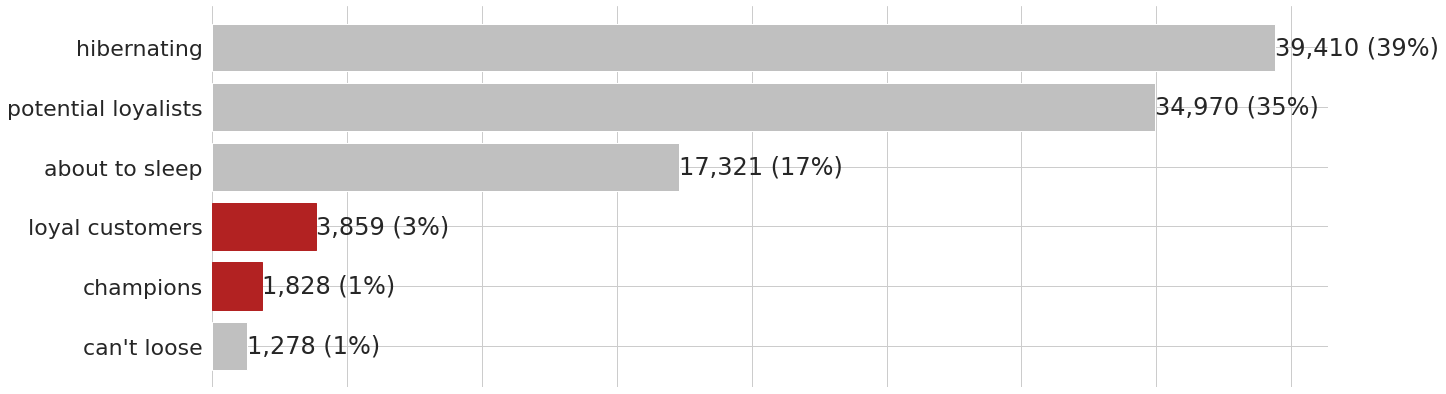

In [113]:

segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()